In [1]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load file csv
df = pd.read_csv("GojekAppReview.csv")

# Ambil kolom
df = df[['content', 'score']].dropna()

# Mapping skor ke label 3 kelas
def map_score(score):
    if score <= 2:
        return "Negatif"
    elif score == 3:
        return "Netral"
    else:
        return "Positif"

df['label'] = df['score'].apply(map_score)

In [3]:
# Pisahkan fitur dan label
X = df[['content']]
y = df['label']

# Split data 80% data latih, 20% data uji
X_latih, X_tes, y_latih, y_tes = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi model
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    text_features=['content'],
    verbose=100,
    loss_function='MultiClass'
)

# Training model
model.fit(X_latih, y_latih, text_features=['content'])

# Prediksi
y_prediksi = model.predict(X_tes)

# Evaluasi
print(f"\nAkurasi: {accuracy_score(y_tes, y_prediksi):.4f}\n")
print(classification_report(y_tes, y_prediksi))

0:	learn: 0.9630451	total: 584ms	remaining: 1m 56s
100:	learn: 0.3354053	total: 41.6s	remaining: 40.7s
199:	learn: 0.3275131	total: 1m 19s	remaining: 0us

Akurasi: 0.8895

              precision    recall  f1-score   support

     Negatif       0.75      0.90      0.82     10834
      Netral       0.82      0.02      0.03      1892
     Positif       0.95      0.94      0.94     32274

    accuracy                           0.89     45000
   macro avg       0.84      0.62      0.60     45000
weighted avg       0.89      0.89      0.87     45000



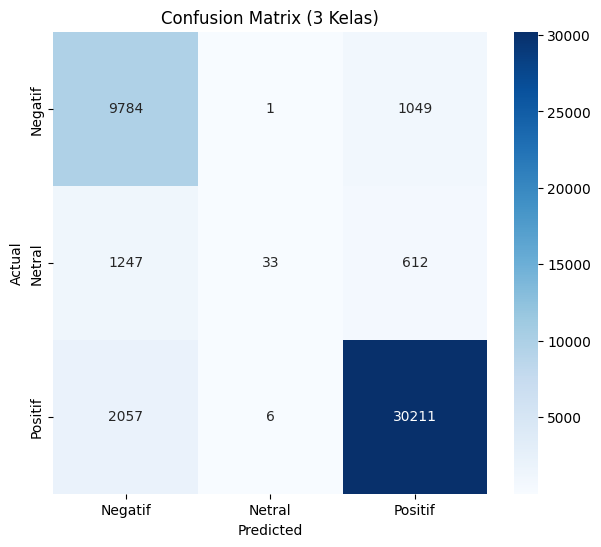

In [4]:
# Confusion matrix
labels_kelas = ["Negatif", "Netral", "Positif"]
cm = confusion_matrix(y_tes, y_prediksi, labels=labels_kelas)

# Visualisasi
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_kelas,
            yticklabels=labels_kelas)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (3 Kelas)')
plt.show()

In [8]:
# Tampilkan contoh ulasan dari data uji
df_hasil = X_tes.copy()
df_hasil['Label Asli'] = y_tes.values
df_hasil['Prediksi'] = y_prediksi.ravel()

# Ambil 5 sampel dari setiap label hasil prediksi
contoh_per_label = df_hasil.groupby('Prediksi').apply(lambda x: x.sample(5, random_state=42)).reset_index(drop=True)

# Tampilkan
print("\nContoh hasil prediksi (5 per label):")
print(contoh_per_label)


Contoh hasil prediksi (5 per label):
                                              content Label Asli Prediksi
0       kasihan driver nya kata nya ada level levelan    Negatif  Negatif
1   Aplikasi hanya bisa buat transaksi paymant tid...    Positif  Negatif
2   Mohon kepada pihak GOJEK lebih kualifikasi lag...    Negatif  Negatif
3   Ni ko promo Go food nya gk ada ya gratis ongki...    Positif  Negatif
4   Layanan gofood CSnya jelek entah ini bugs atau...    Negatif  Negatif
5   Kasih bintang 3 dUlu dan tOlong pAylater sAya ...     Netral   Netral
6   Kenapa bintang 3 1 Pesan Gofood terutama habis...     Netral   Netral
7   Sementara bintang 3 dulu Karna mau pindahkan g...     Netral   Netral
8             Bintang 3 dulu yh soalnya pengguna baru     Netral   Netral
9   Sy kasih bintang 3 karena habis di update kelu...     Netral   Netral
10                                 Gojek is the best     Positif  Positif
11                                              okkkk    Positif  Positif


In [13]:
# Simpan model
model.save_model("model_gojek_sentiment.cbm")

# Simpan hasil prediksi ke file csv
df_hasil.to_csv("hasil_prediksi_uji.csv", index=False, encoding='utf-8-sig')